## importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# loading the data 
ins_data = pd.read_csv('insurance.csv')

In [4]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins_data.shape

(1338, 7)

In [6]:
# getting info about dataset
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# categorical features
    * sex
    * smoker
    * Region

IndentationError: unexpected indent (3918257065.py, line 2)

In [8]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# statistical Measures of the dataset
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

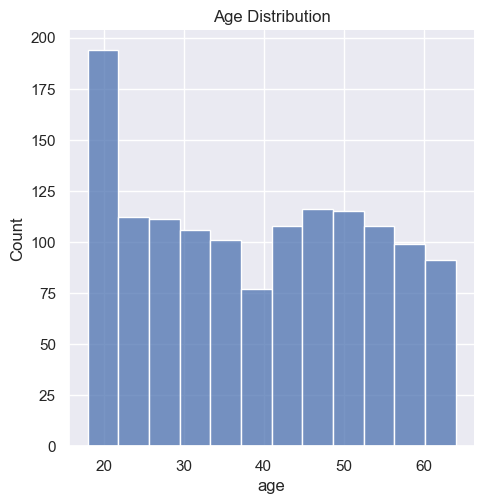

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_data['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

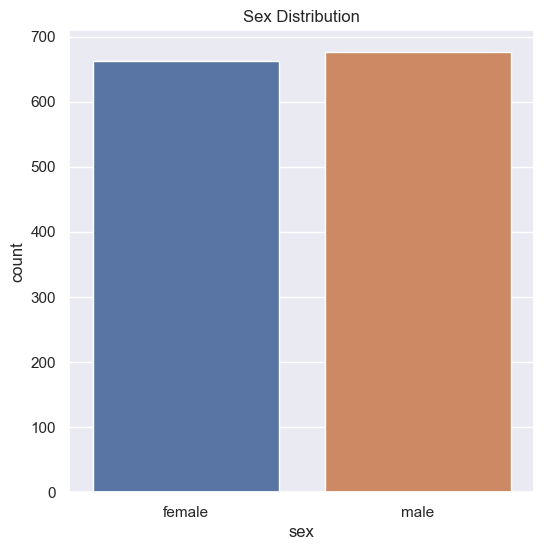

In [11]:
# distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=ins_data)
plt.title('Sex Distribution')

In [12]:
ins_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

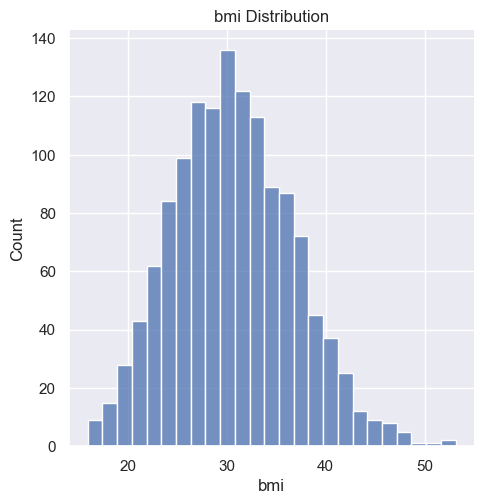

In [13]:
#BMI Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_data['bmi'])
plt.title('bmi Distribution')
plt.show()

In [14]:
# Normal BMI Range-->18.5 to 24.9

<function matplotlib.pyplot.show(close=None, block=None)>

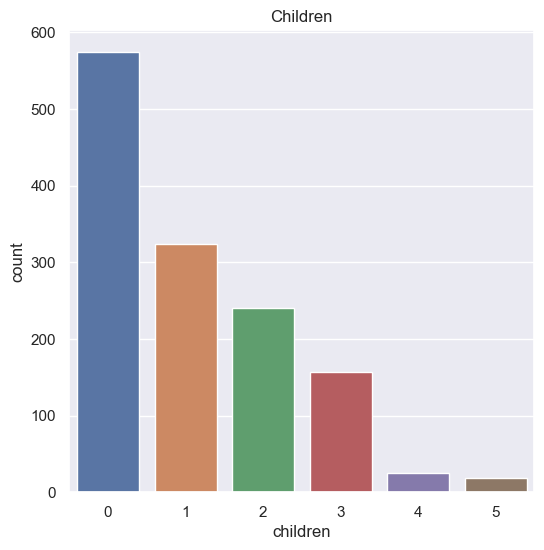

In [15]:
# Children column 
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ins_data)
plt.title('Children')
plt.show

In [16]:
ins_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'smoker')

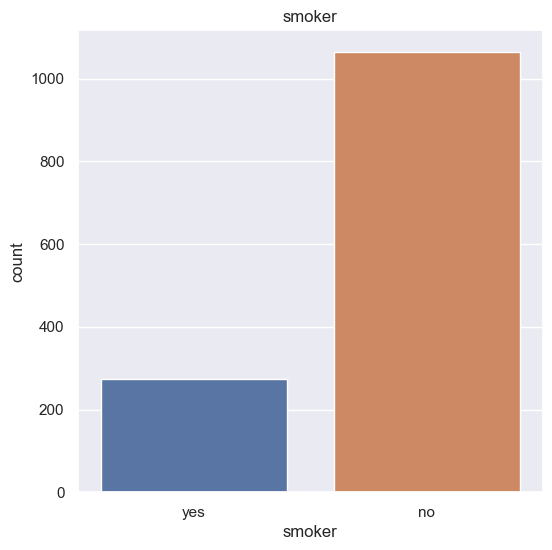

In [17]:
# smoker columns
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ins_data)
plt.title('smoker')

In [18]:
ins_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

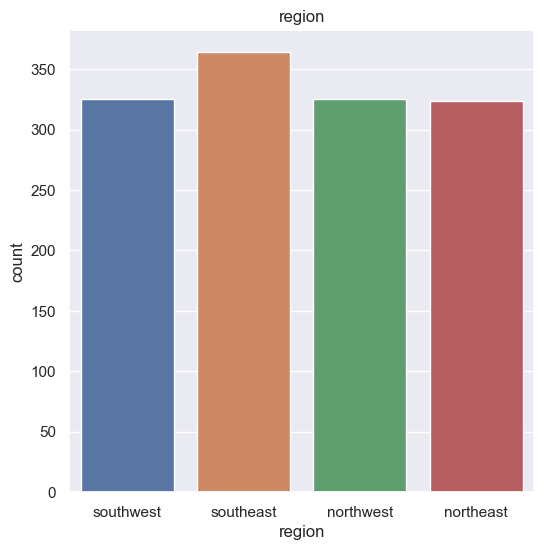

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ins_data)
plt.title('region')
plt.show

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

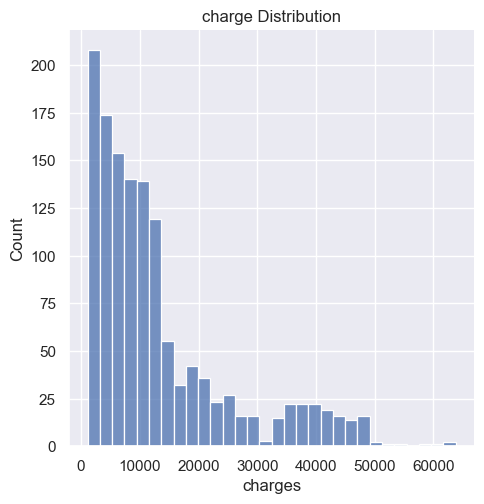

In [20]:
# distribution of charges
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_data['charges'])
plt.title('charge Distribution')
plt.show()

## Encoding categorical features

In [22]:
#Encoding sex column
ins_data.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding smoker column
ins_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding region column
ins_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

## Splitting the data

In [23]:
x=ins_data.drop(columns='charges',axis=1)
y=ins_data['charges']

In [24]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Loading the model

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(x_train,y_train)

LinearRegression()

## model evaluation

In [31]:
#prediction on Ttraining data 
train_data_pred = regressor.predict(x_train)

In [33]:
# R square value
r2_train = metrics.r2_score(y_train,train_data_pred)
print(r2_train)

0.7528965344026


In [35]:
test_data_pred = regressor.predict(x_test)

In [37]:
r2_test = metrics.r2_score(y_test,test_data_pred)
print(r2_test)

0.7398369165415871


## Building a predictive system

In [40]:
input_data = (31,1,25.74,0,1,0)

# changing input to array
inp_dat_arr = np.asarray(input_data)

# reshaping the data 
inp_data_reshape = inp_dat_arr.reshape(1,-1)

pred = regressor.predict(inp_data_reshape)
print(pred)

[3502.43698689]


C:\Users\akash\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
